# Self Study 1

This self study sheet contains some code, and some questions. You should first walk through the code, and then work on the questions. The questions can be answered by extending this notebook with some additional code and text ("markdown") cells. A brief guide to formatting in markdown cells is here:<br>
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>


The following just gives us some tools we'll need

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from scipy.stats import multivariate_normal as mvn


C:\Users\inigo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# A small utility we shall need later:
def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single n-dimensional array of predictions)
    '''
    return np.argmax(A,axis=1)
    

We load the Iris dataset and inspect what it is about. Iris is probably the most heavily used dataset in machine learning. It even has its own Wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
irisdata = load_iris()

print(irisdata.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The Iris data contains 4 features. In order to facillitate visualization of decision regions,
it is better to use two features only, that then can be plotted in 2D. Here we select
two features, and make a scatter plot of their values:

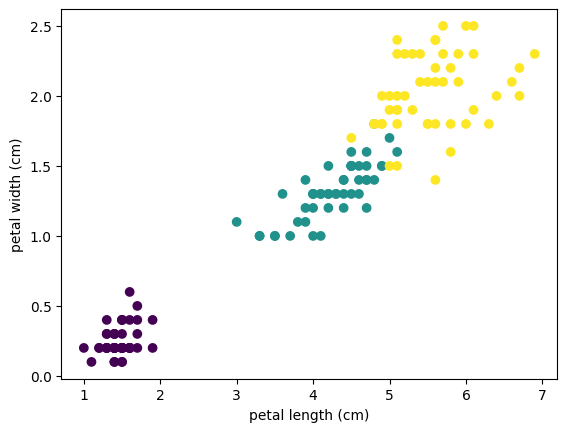

In [4]:
feat1 = 2
feat2 = 3
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target)
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

We next define and train several classification models. We continue to only use the first two features of the data.

First, the **K nearest neighbor** model. To define the model, we have to select the value of K, here called n_neighbors. The .fit function is the generic function for model training. For the K nearest neighbor model there is no actual training, however. 

In [5]:
irisknn = KNeighborsClassifier(n_neighbors=10)
irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


KNeighborsClassifier(n_neighbors=10)

The following defines three different linear models: Linear regression is the same as 'Least squares regression on the slides of the first lecture; logistic regression and linear support vector machine will be studied in more detail in the following lectures. For now we need to know that for each of the models we first specify the desired model class, and then fit (or 'train', or 'learn') the model based on our labeled training data. The linear regression model requires the label information in a different format from the other two models, which is why we first construct the 'one hot encoding' representation. After the models have been fitted, they each define a linear decision boundary, and can classify unlabeled examples. 

In [6]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0
 
irislinreg = LinearRegression()
irislinreg.fit(irisdata.data[:,[feat1,feat2]],onehotclasses)

irislogreg = LogisticRegression()
irislogreg.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

irislinsvc = SVC(kernel='linear')
irislinsvc.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


SVC(kernel='linear')

Plotting labeled data points and decision regions. First, a meshgrid is constructed consisting of a fine grid of points that we classify, and then use for visualization of the decision regions. Then, our classifier is applied to the grid (uncomment the pair of lines you want for either knn or one of the linear models).


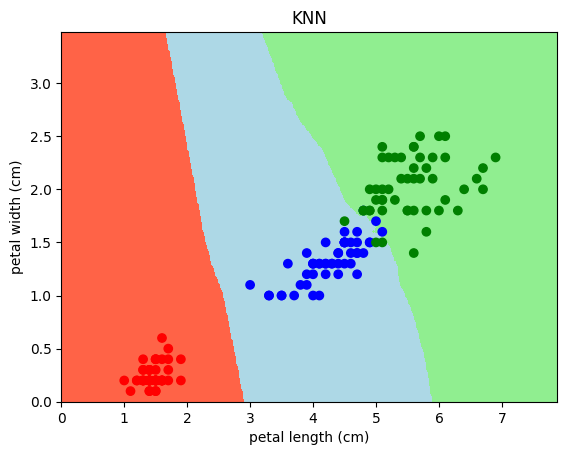

In [13]:
## linreg returns the result for each of the discriminative functions, as opposed to the other models which directly 
## tell you the class they belong to.

maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))
## x: matrix where column 0 = 0.00, column 1 = 0.02 .... column N = maxval1
## y: matrix where row 0 = 0.00, row 1 = 0.02 .... column N = maxval2

Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()]) # KNN
meshclasses = Z

## np.c_[xx.ravel(), yy.ravel()] makes a list of all combinations of xx and yy: (0,0), (0.02,0), ... (5.38, 7.88).
## we make predictions for ALL the grid points, where the predicted classes are stored in meshclasses.
#Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()]) # linear regression
#meshclasses = maxpos(Z) # list with 0s, 1s and 2s of length 106650, where for each zi we keep the max

#Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()]) # logistic regression
#meshclasses = Z

#Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()]) # support vector machine
#meshclasses = Z

meshclasses = meshclasses.reshape(xx.shape) # we reshape it so that it takes the same format as xx.shape (so it can be visualized.)

## meshshapes is now of shape (395, 270), same as the grid.
## for each row, we color the grid based on some threshold values given by [-0.5, 0.5, 1.5, 2.5], mainly that 
## [-0.5,0.5] -> class 0; [0.5, 1.5] -> class 1; [1.5, 2.5] -> class 2.
## let the first row in meshshapes be [1,1,1.....0,0,0], as we can see on the bottom, we begin with light blue, then move on to
## tomato color.
plt.contourf(xx,yy,meshclasses,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.title("KNN")
plt.show()

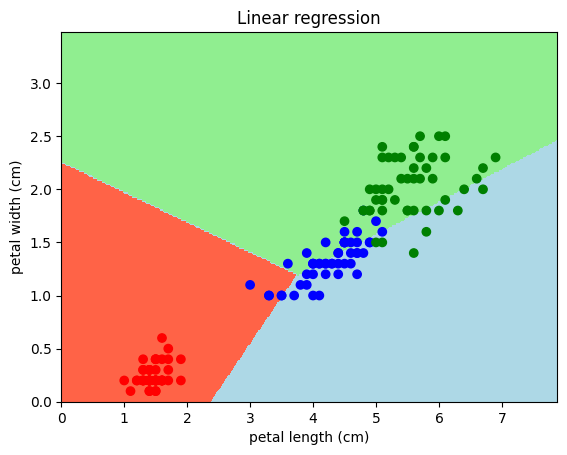

In [12]:
## linreg returns the result for each of the discriminative functions, as opposed to the other models which directly 
## tell you the class they belong to.

maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))
## x: matrix where column 0 = 0.00, column 1 = 0.02 .... column N = maxval1
## y: matrix where row 0 = 0.00, row 1 = 0.02 .... column N = maxval2

#Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()]) # KNN
#meshclasses = Z

## np.c_[xx.ravel(), yy.ravel()] makes a list of all combinations of xx and yy: (0,0), (0.02,0), ... (5.38, 7.88).
## we make predictions for ALL the grid points, where the predicted classes are stored in meshclasses.
Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()]) # linear regression
meshclasses = maxpos(Z) # list with 0s, 1s and 2s of length 106650, where for each zi we keep the max

#Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()]) # logistic regression
#meshclasses = Z

#Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()]) # support vector machine
#meshclasses = Z

meshclasses = meshclasses.reshape(xx.shape) # we reshape it so that it takes the same format as xx.shape (so it can be visualized.)

## meshshapes is now of shape (395, 270), same as the grid.
## for each row, we color the grid based on some threshold values given by [-0.5, 0.5, 1.5, 2.5], mainly that 
## [-0.5,0.5] -> class 0; [0.5, 1.5] -> class 1; [1.5, 2.5] -> class 2.
## let the first row in meshshapes be [1,1,1.....0,0,0], as we can see on the bottom, we begin with light blue, then move on to
## tomato color.
plt.contourf(xx,yy,meshclasses,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.title("Linear regression")
plt.show()

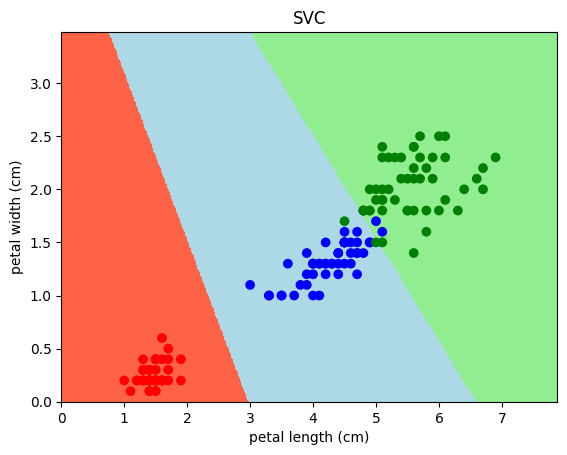

In [10]:
## linreg returns the result for each of the discriminative functions, as opposed to the other models which directly 
## tell you the class they belong to.

maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))
## x: matrix where column 0 = 0.00, column 1 = 0.02 .... column N = maxval1
## y: matrix where row 0 = 0.00, row 1 = 0.02 .... column N = maxval2

#Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()]) # KNN
#meshclasses = Z

## np.c_[xx.ravel(), yy.ravel()] makes a list of all combinations of xx and yy: (0,0), (0.02,0), ... (5.38, 7.88).
## we make predictions for ALL the grid points, where the predicted classes are stored in meshclasses.
#Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()]) # linear regression
#meshclasses = maxpos(Z) # list with 0s, 1s and 2s of length 106650, where for each zi we keep the max

#Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()]) # logistic regression
#meshclasses = Z

Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()]) # support vector machine
meshclasses = Z

meshclasses = meshclasses.reshape(xx.shape) # we reshape it so that it takes the same format as xx.shape (so it can be visualized.)

## meshshapes is now of shape (395, 270), same as the grid.
## for each row, we color the grid based on some threshold values given by [-0.5, 0.5, 1.5, 2.5], mainly that 
## [-0.5,0.5] -> class 0; [0.5, 1.5] -> class 1; [1.5, 2.5] -> class 2.
## let the first row in meshshapes be [1,1,1.....0,0,0], as we can see on the bottom, we begin with light blue, then move on to
## tomato color.
plt.contourf(xx,yy,meshclasses,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.title("SVC")
plt.show()

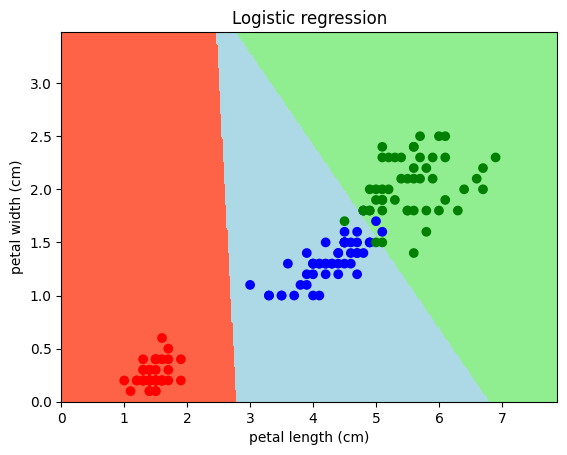

In [11]:
## linreg returns the result for each of the discriminative functions, as opposed to the other models which directly 
## tell you the class they belong to.

maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))
## x: matrix where column 0 = 0.00, column 1 = 0.02 .... column N = maxval1
## y: matrix where row 0 = 0.00, row 1 = 0.02 .... column N = maxval2

#Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()]) # KNN
#meshclasses = Z

## np.c_[xx.ravel(), yy.ravel()] makes a list of all combinations of xx and yy: (0,0), (0.02,0), ... (5.38, 7.88).
## we make predictions for ALL the grid points, where the predicted classes are stored in meshclasses.
#Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()]) # linear regression
#meshclasses = maxpos(Z) # list with 0s, 1s and 2s of length 106650, where for each zi we keep the max

Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()]) # logistic regression
meshclasses = Z

#Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()]) # support vector machine
#meshclasses = Z

meshclasses = meshclasses.reshape(xx.shape) # we reshape it so that it takes the same format as xx.shape (so it can be visualized.)

## meshshapes is now of shape (395, 270), same as the grid.
## for each row, we color the grid based on some threshold values given by [-0.5, 0.5, 1.5, 2.5], mainly that 
## [-0.5,0.5] -> class 0; [0.5, 1.5] -> class 1; [1.5, 2.5] -> class 2.
## let the first row in meshshapes be [1,1,1.....0,0,0], as we can see on the bottom, we begin with light blue, then move on to
## tomato color.
plt.contourf(xx,yy,meshclasses,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.title("Logistic regression")
plt.show()

**Exercise 1** Visualize and describe the decision boundaries obtained from the KNN classifier and the linear regression classifier. Use different values of K in the KNN classifier, and also consider different selections of predictive features. This does not require any extension of the code.

### KNN with K = 3 ###
We can see three very well separated regions. The decision boundaries obtained are based on the 3 nearest neighbors in any position in the data space. 

A first class groups all data objects that are at the bottom, another class groups objects in the middle, and a last class groups objects that are located at the top.

### KNN with lower Ks and higher Ks ###
We notice that by lowering the degree of K, we obtain rougher boundaries, whereas increasing the degree of K gives us smoother boundaries.

__________

### Using Linear Regression
With linear regression, we obtain three areas that all converge in the middle. Compared to KNN, we can see that not all data points are classified correctly, especially in very populated areas in which the blue and green class are near eachother.

**Exercise 2:** Divide the data into 70% training and 30% test data. Learn KNN and linear regression classifiers from the training data, and evaluate their accuracy both on the training and test data. For the KNN classifier,
draw the curves that show train/test accuracy as a function of K. Useful sklearn functions:<br>
`sklearn.model selection.train test split`<br>
`sklearn.metrics.accuracy score`<br>
`sklearn.metrics.confusion matrix`

## -= KNN =-

In [153]:
# we create input list.
list1 = irisdata.data[:,feat1]
list2 = irisdata.data[:,feat2]

# we generate list of lists with the input of the two features.
inputData = [list(a) for a in zip(list1, list2)]
inputData

[[5.1, 3.5],
 [4.9, 3.0],
 [4.7, 3.2],
 [4.6, 3.1],
 [5.0, 3.6],
 [5.4, 3.9],
 [4.6, 3.4],
 [5.0, 3.4],
 [4.4, 2.9],
 [4.9, 3.1],
 [5.4, 3.7],
 [4.8, 3.4],
 [4.8, 3.0],
 [4.3, 3.0],
 [5.8, 4.0],
 [5.7, 4.4],
 [5.4, 3.9],
 [5.1, 3.5],
 [5.7, 3.8],
 [5.1, 3.8],
 [5.4, 3.4],
 [5.1, 3.7],
 [4.6, 3.6],
 [5.1, 3.3],
 [4.8, 3.4],
 [5.0, 3.0],
 [5.0, 3.4],
 [5.2, 3.5],
 [5.2, 3.4],
 [4.7, 3.2],
 [4.8, 3.1],
 [5.4, 3.4],
 [5.2, 4.1],
 [5.5, 4.2],
 [4.9, 3.1],
 [5.0, 3.2],
 [5.5, 3.5],
 [4.9, 3.6],
 [4.4, 3.0],
 [5.1, 3.4],
 [5.0, 3.5],
 [4.5, 2.3],
 [4.4, 3.2],
 [5.0, 3.5],
 [5.1, 3.8],
 [4.8, 3.0],
 [5.1, 3.8],
 [4.6, 3.2],
 [5.3, 3.7],
 [5.0, 3.3],
 [7.0, 3.2],
 [6.4, 3.2],
 [6.9, 3.1],
 [5.5, 2.3],
 [6.5, 2.8],
 [5.7, 2.8],
 [6.3, 3.3],
 [4.9, 2.4],
 [6.6, 2.9],
 [5.2, 2.7],
 [5.0, 2.0],
 [5.9, 3.0],
 [6.0, 2.2],
 [6.1, 2.9],
 [5.6, 2.9],
 [6.7, 3.1],
 [5.6, 3.0],
 [5.8, 2.7],
 [6.2, 2.2],
 [5.6, 2.5],
 [5.9, 3.2],
 [6.1, 2.8],
 [6.3, 2.5],
 [6.1, 2.8],
 [6.4, 2.9],
 [6.6, 3.0],
 [6.8, 2.8],

In [154]:
def KNN(X_train, X_test, Y_train, Y_test, k):
    irisknn = KNeighborsClassifier(n_neighbors=k)
    # we train the KNN model with the training parts.
    irisknn.fit(X_train, Y_train)
    # we predict with the test data.
    Z_Test = irisknn.predict(X_test)
    Z_Train = irisknn.predict(X_train)
    # we predict the model using the true labels and the predicted labels.
    return accuracy_score(Y_train,Z_Train), accuracy_score(Y_test, Z_Test)

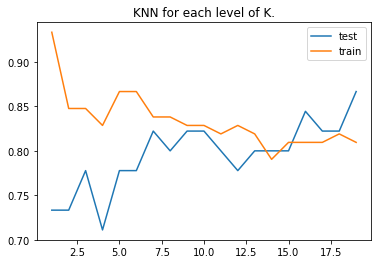

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

maxTries = 20
X_train, X_test, Y_train, Y_test = train_test_split(inputData, irisdata.target, test_size = .3)

accX = range(1,maxTries)
accTrainY = []
accTestY = []
for i in range(1, maxTries):
    x, y = KNN(X_train, X_test, Y_train, Y_test, i)
    accTrainY += [x]
    accTestY += [y]

plt.plot(accX, accTestY, label = "test")
plt.plot(accX, accTrainY, label = "train")
plt.title("KNN for each level of K.")
plt.legend()
plt.show()

##  -= Linear regression classifiers =-

In [161]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0

X_train, X_test, Y_train, Y_test = train_test_split(inputData, onehotclasses, test_size = .3)

linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Ztr = linreg.predict(X_train)
Zte = linreg.predict(X_test)
meshclassesTr = maxpos(Ztr)
meshclassesTe = maxpos(Zte)

print("Train accuracy: {:.3f}".format(accuracy_score(maxpos(Y_train), meshclassesTr)))
print("Test accuracy: {:.3f}".format(accuracy_score(maxpos(Y_test), meshclassesTe)))

Train accuracy: 0.810
Test accuracy: 0.733


**Exercise 3:**  Also perform (some) of the previous experiments using the full set of 4 predictive features. How does that
change the classification performance? Which of the 3 Iris classes is easiest to classify? Why?

In [162]:
lists = []
for i in range(4):
    lists += [irisdata.data[:,i]]

inputData = [list(a) for a in zip(*lists)] # placing * in front unravels it.
inputData

[[5.1, 3.5, 1.4, 0.2],
 [4.9, 3.0, 1.4, 0.2],
 [4.7, 3.2, 1.3, 0.2],
 [4.6, 3.1, 1.5, 0.2],
 [5.0, 3.6, 1.4, 0.2],
 [5.4, 3.9, 1.7, 0.4],
 [4.6, 3.4, 1.4, 0.3],
 [5.0, 3.4, 1.5, 0.2],
 [4.4, 2.9, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [5.4, 3.7, 1.5, 0.2],
 [4.8, 3.4, 1.6, 0.2],
 [4.8, 3.0, 1.4, 0.1],
 [4.3, 3.0, 1.1, 0.1],
 [5.8, 4.0, 1.2, 0.2],
 [5.7, 4.4, 1.5, 0.4],
 [5.4, 3.9, 1.3, 0.4],
 [5.1, 3.5, 1.4, 0.3],
 [5.7, 3.8, 1.7, 0.3],
 [5.1, 3.8, 1.5, 0.3],
 [5.4, 3.4, 1.7, 0.2],
 [5.1, 3.7, 1.5, 0.4],
 [4.6, 3.6, 1.0, 0.2],
 [5.1, 3.3, 1.7, 0.5],
 [4.8, 3.4, 1.9, 0.2],
 [5.0, 3.0, 1.6, 0.2],
 [5.0, 3.4, 1.6, 0.4],
 [5.2, 3.5, 1.5, 0.2],
 [5.2, 3.4, 1.4, 0.2],
 [4.7, 3.2, 1.6, 0.2],
 [4.8, 3.1, 1.6, 0.2],
 [5.4, 3.4, 1.5, 0.4],
 [5.2, 4.1, 1.5, 0.1],
 [5.5, 4.2, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.2],
 [5.0, 3.2, 1.2, 0.2],
 [5.5, 3.5, 1.3, 0.2],
 [4.9, 3.6, 1.4, 0.1],
 [4.4, 3.0, 1.3, 0.2],
 [5.1, 3.4, 1.5, 0.2],
 [5.0, 3.5, 1.3, 0.3],
 [4.5, 2.3, 1.3, 0.3],
 [4.4, 3.2, 1.3, 0.2],
 [5.0, 3.5,

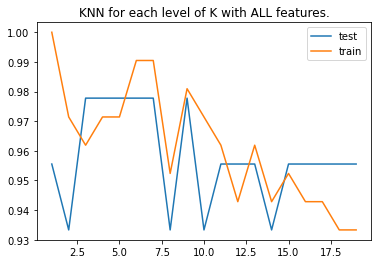

In [163]:
maxTries = 20
X_train, X_test, Y_train, Y_test = train_test_split(inputData, irisdata.target, test_size = .3)

accX = range(1,maxTries)
accTrainY = []
accTestY = []
for i in range(1, maxTries):
    x, y = KNN(X_train, X_test, Y_train, Y_test, i)
    accTrainY += [x]
    accTestY += [y]

plt.plot(accX, accTestY, label = "test")
plt.plot(accX, accTrainY, label = "train")
plt.title("KNN for each level of K with ALL features.")
plt.legend()
plt.show()

In [192]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size): 
    onehotclasses[i][irisdata.target[i]]=1.0

X_train, X_test, Y_train, Y_test = train_test_split(inputData, onehotclasses, test_size = .3)

linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Ztr = linreg.predict(X_train)
Zte = linreg.predict(X_test)
meshclassesTr = maxpos(Ztr)
meshclassesTe = maxpos(Zte)

print("Train accuracy: {:.3f}".format(accuracy_score(maxpos(Y_train), meshclassesTr)))
print("Test accuracy: {:.3f}".format(accuracy_score(maxpos(Y_test), meshclassesTe)))

Train accuracy: 0.886
Test accuracy: 0.756


With all features, the accuracy of the classifier increases as there is more data about each data object. Moreover, we notice that the classifier with two features can be pretty lacking if we're using sepal length and sepal width as the features (**little correlation!!!**), as opposed to petal length and petal width.

That's why, when using **all 4 features**, we always obtain a good classifier because those features with more discriminative power are considered.

**As for the class that is most easy to classify, it's Iris Virginica**. We can observe this when looking at the scatterplots:
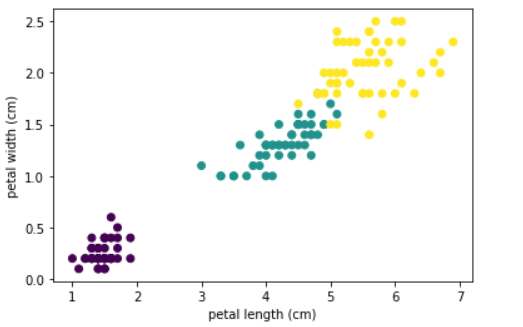

The two most correlated features to the classes can separate very well Virginica to the other two classes, but as for the others they seem to be closer feature-based.

------------

Finally, we revisit Exercise 2 from the first exercise sheet. We construct a dataset that is linearly separable, but may invite overfitting:

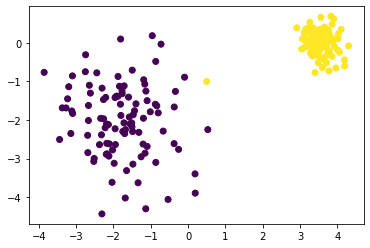

In [171]:
# mean = (-2,2) and covariance = ((1,0), (0,1))
# (100, 2)
gauss1= mvn(mean=(-2,-2),cov=((1,0),(0,1))).rvs(random_state=1,size=100)
gauss2= mvn(mean=(3.5,0),cov=((0.1,0),(0,0.1))).rvs(random_state=1,size=100)
# concatenates gauss1 with gauss2. (200, 2)
X=np.vstack([gauss1,gauss2])
# add point (0.5 , -1), which would represent the outlier.
X=np.vstack([X,(0.5,-1)])
# 100 0s, and 101 1s.
Y=np.hstack([np.zeros(100),np.ones(101)])

# X[:, 0] represents all X, X[:,1] represents all Y.
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

Prepare a meshgrid for the visualization of decision regions:


In [174]:
leftx=np.min(X[:,0])-0.5
rightx=np.max(X[:,0])+0.5
lefty=np.min(X[:,1])-0.5
righty=np.max(X[:,1])+0.5

xx, yy = np.meshgrid(np.arange(leftx, rightx, 0.02), np.arange(lefty, righty, 0.02))


**Exercise 4**: What classifiers can you construct that appear to overfit by classifying the yellow outlier point as belonging to the yellow class? What other classifiers classify this point as purple?

For the yellow outlier to belong to the yellow class, we can use KNN = 1.

For the yellow outlier to belong to the purple class, we can use KNN with any other value, and models such as Linear Regression

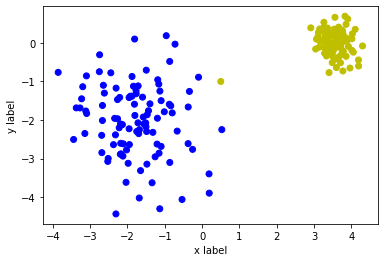

In [175]:
gaussknn = KNeighborsClassifier(n_neighbors=1)
gaussknn.fit(X, Y)
Z = gaussknn.predict(X)
meshclasses = Z

plt.scatter(X[:,0],X[:,1],c=Z, cmap = mpl.colors.ListedColormap(['b', 'y']))
plt.xlabel("x label")
plt.ylabel("y label")
plt.show()

_____

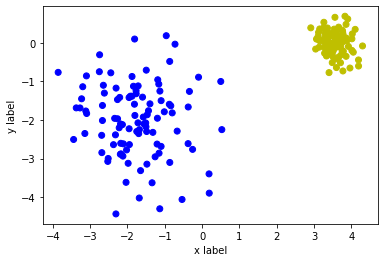

In [213]:
onehotclasses = np.zeros((len(Y),2))
for i in range(len(Y)): 
    onehotclasses[i][int(Y[i])]=1.0

linreg = LinearRegression()
linreg.fit(X,onehotclasses)
Ztr = linreg.predict(X)
meshclassesTr = maxpos(Ztr)

plt.scatter(X[:,0],X[:,1],c=meshclassesTr, cmap = mpl.colors.ListedColormap(['b', 'y']))
plt.xlabel("x label")
plt.ylabel("y label")
plt.show()

----

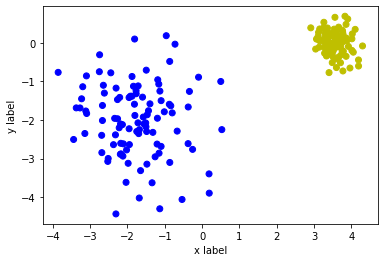

In [239]:
logreg = LogisticRegression()
logreg.fit(X,Y)
Ztr = logreg.predict(X)
meshclassesTr = Ztr

plt.scatter(X[:,0],X[:,1],c=meshclassesTr, cmap = mpl.colors.ListedColormap(['b', 'y']))
plt.xlabel("x label")
plt.ylabel("y label")
plt.show()

-----

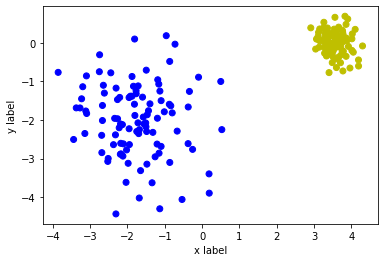

In [244]:
logreg = SVC(kernel = 'linear') # linear, poly, rbf, sigmoid
logreg.fit(X,Y)
Ztr = logreg.predict(X)
meshclassesTr = Ztr

plt.scatter(X[:,0],X[:,1],c=meshclassesTr, cmap = mpl.colors.ListedColormap(['b', 'y']))
plt.xlabel("x label")
plt.ylabel("y label")
plt.show()